#  <center>Project: Analyze A/B Test Results</center>

## <center>by Patrick Bloomingdale</center>
<center>This project is part of Udacity's Data Analyst Nanodegree</center>

##  <font color ='blue'>Table of Contents</font>
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusion)

****
<a id='intro'></a>
##  <font color ='blue'>Introduction</font>
A/B tests are very commonly performed by data analysts and data scientists.  It is important to get some practice working with the difficulties of these. 

For this project, I worked to understand the results of an A/B test run by an e-commerce website.  The company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product.

My goal was to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

****
<a id='probability'></a>
##  <font color ='blue'>Part I - Probability</font>
To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

**`I.1.`** Now, read in the `ab_data.csv` data. Store it in `df`.  

**`I.1a.`** Read in the dataset and take a look at the top few rows here:

In [2]:
# import ab_data.csv and look at the first five rows in the dataframe
df = pd.read_csv('ab_data.csv')

# look at the first five rows of the dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**`I.1b.`** Use the below cell to find the number of rows in the dataset.

In [3]:
# number of rows in the dataset
df_rows = df.shape[0]
print("There are {} rows in the dataset.".format(df_rows))

There are 294478 rows in the dataset.


**`I.1c.`** The number of unique users in the dataset.

In [4]:
# number of unique user id's in the dataset
df_unique = df.user_id.nunique()
print("There are {} unique users in the dataset.".format(df_unique))

There are 290584 unique users in the dataset.


**`I.1d.`** The proportion of users converted.

In [5]:
# proportion of users converted
df_converted = df.converted.mean()
print("The proportion of users converted is {}%.".format(round(df_converted * 100)))

The proportion of users converted is 12.0%.


**`I.1e.`** The number of times the `new_page` and `treatment` don't line up.

In [6]:
# number of times new_page and treatment don't line up
df_dont_line_up = df.query("(landing_page == 'new_page' and group == 'control') or (landing_page == 'old_page' and group == 'treatment')")

print('The number of times the new_page and treatment don\'t line up is {}.'.format(df_dont_line_up.shape[0]))

The number of times the new_page and treatment don't line up is 3893.


**`I.1f.`** Do any of the rows have missing values?

In [7]:
# look for rows with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [8]:
print('UNDERSTANDING THE DATASET, QUESTION 1 FINDINGS:')
print("- There are {} rows in the dataset.".format(df_rows))
print("- There are {} unique users in the dataset.".format(df_unique))
print("- The proportion of users converted is {}%.".format(round(df_converted * 100)))
print('- The number of times the new_page and treatment don\'t line up is {}.'.format(df_dont_line_up.shape[0]))
print('- There are no rows with missing values.')

UNDERSTANDING THE DATASET, QUESTION 1 FINDINGS:
- There are 294478 rows in the dataset.
- There are 290584 unique users in the dataset.
- The proportion of users converted is 12.0%.
- The number of times the new_page and treatment don't line up is 3893.
- There are no rows with missing values.


**`I.2.`** For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  

**`I.2a.`** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# remove the rows where the landing_page and group columns don't align and
#  store the new dataframe as df2. 
df2 = df.query("(landing_page == 'old_page' and group == 'control') or (landing_page == 'new_page' and group == 'treatment')")

In [10]:
# check that all of the correct rows were removed 
df2_rows_removed = df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]
print('Now, the number of rows where the landing_page and group columns don\'t align is {}.'.format(df2_rows_removed))

Now, the number of rows where the landing_page and group columns don't align is 0.


**`I.3.`** Use **df2** and the cells below to answer questions for Quiz3 in the classroom.

**`I.3a.`** How many unique **user_id**s are in **df2**?

In [11]:
#find the number of unique user_ids in df2
df2_unique = df2.user_id.nunique()

print('The number of unique user_ids in df2 is {}.'.format(df2_unique))

The number of unique user_ids in df2 is 290584.


**`I.3b.`** There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#find the one user_id that is repeated
user_repeated = df2[df2.duplicated(['user_id'])]['user_id'].unique()
print('The repeated user_id is {}'.format(user_repeated))

The repeated user_id is [773192]


**`I.3c.`** What is the row information for the repeat **user_id**? 

In [13]:
#find the row information for the repeat user_id
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**`I.3d.`** Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#keep the duplicate row that appears first
df2 = df2.drop_duplicates(['user_id'], keep='first')

In [15]:
#confirm duplicate row dropped
user_dropped = df2.user_id.duplicated().sum()
print('There are {} duplicate rows in df2.'.format(user_dropped))

There are 0 duplicate rows in df2.


In [16]:
print('UPDATED DATAFRAME, QUESTION 3 FINDINGS:')
print('- The number of unique user_ids in df2 is {}.'.format(df2_unique))
print('- The repeated user_id was {}'.format(user_repeated))

UPDATED DATAFRAME, QUESTION 3 FINDINGS:
- The number of unique user_ids in df2 is 290584.
- The repeated user_id was [773192]


**`I.4.`** Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

**`I.4a.`** What is the probability of an individual converting regardless of the page they receive?

In [17]:
# probability of converting regardless of page
df2_converting = df2.converted.mean()
#print('The probability of converting regardless of the page is: {}'.format(df2_converting))
print('The probability of converting regardless of the page is: {}'.format(round(df2_converting, 4)))

The probability of converting regardless of the page is: 0.1196


**`I.4b.`** Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# given an individual received the control page, the probability of converting
df2_control = df2[df2['group'] == 'control']['converted'].mean()
#print('The probability that an individual in the control group converted is: {}'.format(df2_control))
print('The probability that an individual in the control group converted is: {}'.format(round(df2_control, 4)))

The probability that an individual in the control group converted is: 0.1204


**`I.4c.`** Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# given that an individual received the treatment, the probability of converting
df2_treatment = df2[df2['group'] == 'treatment']['converted'].mean()
#print('The probability that an individual in the treatment group converted is: {}'.format(df2_treatment))
print('The probability that an individual in the treatment group converted is: {}'.format(round(df2_treatment, 4)))

The probability that an individual in the treatment group converted is: 0.1188


**`I.4d.`** What is the probability that an individual received the new page?

In [20]:
# probability that an individual received the new page
df2_new_page = len(df2.query("landing_page == 'new_page'")) / df2.shape[0]
#print('The probability that an individual received the new page is: {}.'.format(df2_new_page))
print('The probability that an individual received the new page is: {}.'.format(round(df2_new_page, 4)))

The probability that an individual received the new page is: 0.5001.


In [21]:
# probability that an individual received the new page
df2_old_page = len(df2.query("landing_page == 'old_page'")) / df2.shape[0]
#print('The probability that an individual received the old page is: {}.'.format(df2_old_page))
print('The probability that an individual received the old page is: {}.'.format(round(df2_old_page, 4)))

The probability that an individual received the old page is: 0.4999.


**`I.4e.`** Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

In [22]:
# print the findings question 4
print('PROBABILITY, QUESTION 4 FINDINGS:')
print('- The probability of converting regardless of the page is: {}'.format(round(df2_converting, 4)))
print('- The probability that an individual in the control group converted is: {}'.format(round(df2_control, 4)))
print('- The probability that an individual in the treatment group converted is: {}'.format(round(df2_treatment, 4)))
print('- The probability that an individual received the new page is: {}.'.format(round(df2_new_page, 4)))
print('- The probability that an individual received the old page is: {}.'.format(round(df2_old_page, 4)))

PROBABILITY, QUESTION 4 FINDINGS:
- The probability of converting regardless of the page is: 0.1196
- The probability that an individual in the control group converted is: 0.1204
- The probability that an individual in the treatment group converted is: 0.1188
- The probability that an individual received the new page is: 0.5001.
- The probability that an individual received the old page is: 0.4999.


### <font color='green'>Put your answer here.</font>

**Based on the findings above:**
- An individual in the control group converted of 0.1204 (12.04%) is slightly higher than the treatment group of 0.1188 (11.88%).
> This difference is small 0.0016 (0.16%).
- The probability of converting regardless of the page of 0.1188 (11.88%) is simular to both control group of 0.1204 (12.0%) and treatment group of 0.1196 (11.9%).
- The probability of a user receiving the new page of 0.5001 (50.01%) is almost the same of a user receiving the old page of 0.4999 (49.99%).
> This confirms that the users receiving either the new or old page is almost the same.

<center><font color='green'>**More proof is needed to determine if one page leads to more conversions**</font></center>

****
<a id='ab_test'></a>
##  <font color='blue'>Part II - A/B Test</font>
Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  

**`II.1.`** For now, consider you need to make the decision just based on all the data provided.  Assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypotheses** (**$H_{0}$**): (**$p_{new}$**) <= (**$p_{old}$**) 
>New page (**$p_{new}$**) conversions are no better, or even worse, than old page (**$p_{old}$**) conversions.


**Alternative Hypotheses** (**$H_{1}$**): (**$p_{new}$**) > (**$p_{old}$**) 
>New page (**$p_{new}$**) conversions are better than old page (**$p_{new}$**) conversions. 

Because we want to test if a new page was better than an old page, we set that up in the alternative.


**`II.2.`** Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.

**`II.2a.`** What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
# convert rate for Pnew  under the null
# proportion of users who converted to new_page
p_new = df2.converted.mean()
#print('The convert rate for new_page under the null is: {}.'.format(p_new))
print('The convert rate for new_page under the null is: {}.'.format(round(p_new, 4)))

The convert rate for new_page under the null is: 0.1196.


In [24]:
# look at the first five rows of the df2 dataset
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**`II.2b.`** What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
# convert rate for Pold  under the null
# proportion of users who converted to old_page
p_old = df2.converted.mean()
#print('The convert rate for old_page under the null is: {}.'.format(p_old))
print('The convert rate for old_page under the null is: {}.'.format(round(p_old, 4)))

The convert rate for old_page under the null is: 0.1196.


**`II.2c.`** What is $n_{new}$?

In [26]:
# n_new
n_new = len(df2.query("group == 'treatment'"))
print('The n_new is: {}.'.format(n_new))

The n_new is: 145310.


**`II.2d.`** What is $n_{old}$?

In [27]:
# n_old
n_old = len(df2.query("group == 'control'"))
print('The n_old is: {}.'.format(n_old))

The n_old is: 145274.


**`II.2e.`** Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
#new page converted
new_page_converted = np.random.binomial(n_new,p_new)
print('The new_page_converted is: {}.'.format(new_page_converted))

The new_page_converted is: 17516.


In [29]:
#new page converted rate 
n_page_converted = np.random.binomial(1, p_new, n_new)
print('The new_page convert rate: {}.'.format(n_page_converted.mean()))
print('The new_page convert rate: {}.'.format(round(n_page_converted.mean(), 4)))

The new_page convert rate: 0.11956506778611245.
The new_page convert rate: 0.1196.


**`II.2f.`** Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
#old page converted
old_page_converted = np.random.binomial(n_old,p_old)
print('The old_page_converted is: {}.'.format(old_page_converted))

The old_page_converted is: 17410.


In [31]:
#old page convert rate
o_page_converted = np.random.binomial(1, p_old, n_old)
print('The old_page convert rate: {}.'.format(o_page_converted.mean()))
print('The old_page convert rate: {}.'.format(round(o_page_converted.mean(), 4)))

The old_page convert rate: 0.11934000578217713.
The old_page convert rate: 0.1193.


**`II.2g.`** Find $p_{new}$ - $p_{old}$ for your simulated values from part `II.2e.` and `II.2f.`

In [32]:
# simulate values
sim_val = new_page_converted/n_new - old_page_converted/n_old
print('Simulated vaues are {}.'.format(sim_val))
print('Simulated vaues are {}.'.format(round(sim_val, 4)))

Simulated vaues are 0.0006997843908725099.
Simulated vaues are 0.0007.


**`II.2h.`** Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **`II.2a.`** through **`II.2g.`** above.  Store all 10,000 values in **p_diffs**.

In [33]:
# simulate 10,000 values
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(diff)

**`II.2i.`** Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

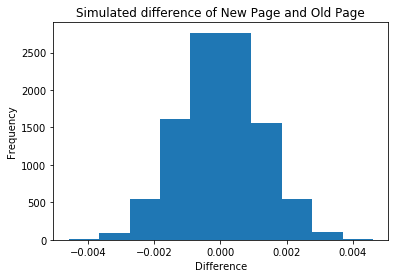

In [34]:
# plot histogram
plt.hist(p_diffs)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Simulated difference of New Page and Old Page');

**`II.2j.`** What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
# proportion of the p_diffs > actual difference observed
act_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()

p_value = (p_diffs > act_diff).mean()
print('The proportion of the p_diffs greater than the actual difference observed is: {}.'.format(p_value))

The proportion of the p_diffs greater than the actual difference observed is: 0.891.


**`II.2k.`** In words, explain what you just computed in part **`II.2j.`**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

### <font color='green'>Put your answer here.</font>

**With a p-value of 89% we should not move away from the null hypothesis.**

**`II.2l.`** We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

convert_old = df2.query(" landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query(" landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]
convert_old

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489

**`II.2m.`** Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [37]:
# compute z-score and p-value using sm.stats.proportions_ztest
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print('z-score:', z_score, '\np-value:', p_value)

z-score: 1.31092419842 
p-value: 0.905058312759


In [38]:
from scipy.stats import norm

#how significant our z-score is
z_score_sig = norm.cdf(z_score)

#critical value at 95% confidence
critical_value = norm.ppf(1-(0.05/2))

print('Our z-score significant value is:',  round(z_score_sig, 4))
print('The critical value at 95% confidence is:', round(critical_value, 4))

Our z-score significant value is: 0.9051
The critical value at 95% confidence is: 1.96


**`II.2n.`** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **`II.2j.`** and **`II.2k.`**?

### <font color='green'>Put your answer here.</font>
 
**`z-score:` 1.31**<br>
Using a confidence level of 0.95 there is a 95% probability that any normal variable will fall within 1.96 standard deviations of its mean. Therefore the critical value of z is 1.96 
>Since our z-score of 1.31 falls within the critical value (-1.96 and 1.96) of 1.96, it will fall within 1.96 standard deviations of its mean.

**`p-value:`0.905**<br>
The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.
Large p-values suggest we should suggest that we shouldn't move away from the null hypothesis <br>(**$p_{new}$** <= **$p_{old}$**).
>Since our p-value of 0.905 (90%) is large we should not move away from the null hypothesis.


In [39]:
print('A/B TEST, QUESTION 2 FINDINGS:')
print('- The convert rate for new_page under the null is: {}.'.format(round(p_new, 4)))
print('- The convert rate for old_page under the null is: {}.'.format(round(p_old, 4)))
print('- The n_new is: {}.'.format(n_new))
print('- The n_old is: {}.'.format(n_old))
print('- The new_page_converted is: {}.'.format(new_page_converted))
print('- The new_page convert rate: {}.'.format(round(n_page_converted.mean(), 4)))
print('- The old_page_converted is: {}.'.format(old_page_converted))
print('- The old_page convert rate: {}.'.format(round(o_page_converted.mean(), 4)))
print('- Simulated vaues are {}.'.format(round(sim_val, 4)))
print('- The proportion of the p_diffs greater than the actual difference observed is: {}.'.format(round(act_diff, 4)))
print('- The p-value is: {}.'.format(round(p_value, 4)))
print('- The z-score is: {}.'.format(round(z_score, 4)))

A/B TEST, QUESTION 2 FINDINGS:
- The convert rate for new_page under the null is: 0.1196.
- The convert rate for old_page under the null is: 0.1196.
- The n_new is: 145310.
- The n_old is: 145274.
- The new_page_converted is: 17328.
- The new_page convert rate: 0.1196.
- The old_page_converted is: 17260.
- The old_page convert rate: 0.1193.
- Simulated vaues are 0.0007.
- The proportion of the p_diffs greater than the actual difference observed is: -0.0015.
- The p-value is: 0.9051.
- The z-score is: 1.3109.


****
<a id='regression'></a>
## <font color='blue'>Part III - Regression</font>

**`III.1.`** In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

**`III.1a.`** Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### <font color='green'>Put your answer here.</font>
>**Logistic Regression**

**`III.1b.`** The goal is to use **statsmodels** to fit the `Logistic Regression Model` specified in part **`III.a.`** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
#create intercept column
df2['intercept'] = 1
df2[['control','treatment']] = pd.get_dummies(df2['group'])

In [41]:
# look to makes sure intercept, control, and treatment columns created
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [42]:
#create ab_page column
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']

In [43]:
# # look to makes sure ab_page column created
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0


**`III.1c.`** Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **`III.1b.`** to predict whether or not an individual converts.

In [44]:
# use statsmodels to import regression model
#import statsmodels.api as sm
logit = sm.Logit(df2['converted'],df2[['intercept' ,'treatment']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**`III.1d.`** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
# summary of model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 Sep 2018   Pseudo R-squ.:               8.077e-06
Time:                        16:36:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [46]:
#exponentiate treatment
np.exp(-0.0150)

0.98511193960306265

In [47]:
#values less than 1 -reciprocal
recip_treatment = round(1/np.exp(-0.0150), 2)
print('For every 1 unit decrease in conversion, treatment is {} times as likely holding all else constant.'.format(round(recip_treatment, 2)))

For every 1 unit decrease in conversion, treatment is 1.02 times as likely holding all else constant.


**`III.1e.`** What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?

### <font color='green'>Put your answer here.</font>
- **The p-value associated with the `ab_page` is 0.190**
- **<font color='green'>Part II</font> one-sided test was used to find the value, and for <font color='green'>Logistic Regression</font> we use two-sided test to find the value.</font>**

**`III.1f.`** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### <font color='green'>Put your answer here.</font>
**ADVANTAGES:** Adding factors to my regression model can prevent bias in the estimate of the other regression coefficient but can also increase variance of other regression coefficient.

**DISADVANTAGES:** Adding factors to my regression model can increase the variance of the estimate of other correlation coefficient and will not have any benefits. Also, if your data set is incomplete or doesn't have enough rows of data it will be hard to draw a conclusion.<br><br>
<center>**<font color='green'>Keep in mind that with regression models you can only establish relationships</font>**</center>

**`III.1g.`** Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.

Does it appear that country had an impact on conversion? 

In [48]:
# read in the countries.csv dataset
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [49]:
# merge datasets to approporiate rows
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,1


In [50]:
# look for rows with missing values
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 834778 to 934996
Data columns (total 9 columns):
country         290584 non-null object
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
control         290584 non-null uint8
treatment       290584 non-null uint8
ab_page         290584 non-null uint8
dtypes: int64(2), object(4), uint8(3)
memory usage: 16.4+ MB


In [51]:
# look at the unique values for country
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [52]:
#create dummy variables
df_new[['CA','US']] = pd.get_dummies(df_new['country'])[['CA','US']]
#df_new['country'].astype(str).value_counts()

In [53]:
# look to makes sure CA and US columns created 
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page,CA,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,1,0,0


**`III.1h.`** Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [54]:
#create the necessary additional columns, and fit the new model
df_new['intercept'] = 1

mod = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'CA']])
results = mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 10 Sep 2018   Pseudo R-squ.:               1.521e-05
Time:                        16:36:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
==============================================================================
"""

In [55]:
#exponentiate US and CA
np.exp(-0.0099), np.exp(-0.0507)

(0.99014884368295719, 0.95056379690040338)

In [56]:
#values less than 1 -reciprocal
round(1/np.exp(-0.0099), 2), round(1/np.exp(-0.0507), 2)

(1.01, 1.05)

****
<a id='conclusions'></a>
## <font color='blue'>Conclusion</font>

The conversion rates for the new page and old page are similar, so there is not enough evidence to reject the null hypothesis. 
- An individual in the control group converted of 0.1204 (12.04%) is slightly higher than the treatment group of 0.1188 (11.88%).
> This difference is small 0.0016 (0.16%).
- The probability of converting regardless of the page of 0.1188 (11.88%) is similar to both control group of 0.1204 (12.0%) and treatment group of 0.1196 (11.9%).
- The probability of a user receiving the new page of 0.5001 (50.01%) is almost the same of a user receiving the old page of 0.4999 (49.99%).
> This confirms that the users receiving either the new or old page is almost the same.

In addition, when looking at additional factors (countries of US and CA), conversions are almost the same:
> - For every 1 unit decrease in conversion, US is 1.01 times as likely holding all else constant.
> - For every 1 unit decrease in conversion, CA is 1.05 times as likely holding all else constant.

Therefore, there is no evidence that the new page is better than the old page. Additional factors, such as looking at the influences associated with time on conversion can be looked at.

### RESOURCES
- http://blog.minitab.com/blog
- http://www.math.armstrong.edu/statsonline/5/5.3.2.html
- http://knowledgetack.com/python/statsmodels/proportions_ztest/
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0